In [51]:
### Pymaceuticals: Review
# The following study evaluated 10 groups of mice over 
## Tumor Response to Treatment
# Metastatic Spread During Treatment
# Survival of Mice
# Use the visualizations you generated from the study data as the basis for your observations.

In [52]:
# Dependencies and Setup
%matplotlib inline
import csv, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join("data","mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data","clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load,header=0)
trial_df = pd.read_csv(clinical_trial_data_to_load,header=0)

# Combine the data into a single dataset
df = pd.merge(mouse_df,trial_df, how='outer', on='Mouse ID')
# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [53]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = df.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tum_mean_df = pd.DataFrame({"Tumor Volume (mm3)":tumor_mean}).reset_index()

# Preview DataFrame
tum_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [54]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se = df.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].sem()

# Create list for reference in Tumor Response
cap_se = list(tumor_se['Capomulin'])
cef_se = list(tumor_se['Ceftamin'])
inf_se = list(tumor_se['Infubinol'])
ket_se = list(tumor_se['Ketapril'])
naf_se = list(tumor_se['Naftisol'])
pro_se = list(tumor_se['Propriva'])
ram_se = list(tumor_se['Ramicane'])
ste_se = list(tumor_se['Stelasyn'])
zon_se = list(tumor_se['Zoniferol'])
pla_se = list(tumor_se['Placebo'])

# Convert to DataFrame
tum_se_df= pd.DataFrame({"Tumor Volume (mm3)":tumor_se}).reset_index()

# # Preview DataFrame
tum_se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [55]:
# Minor Data Munging to Re-Format the Data Frames
by_drug = pd.pivot_table(df, values='Tumor Volume (mm3)',columns=['Drug'],index=['Timepoint'], aggfunc='mean')

# Preview that Reformatting worked
by_drug

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


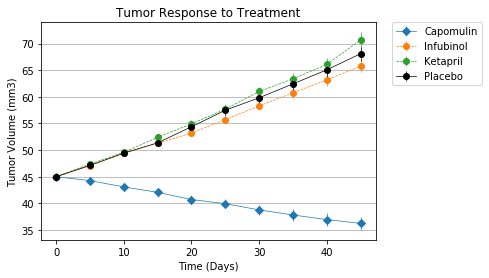

In [56]:
# Generate the Plot (with Error Bars)
x = by_drug.index

plt.errorbar(x, y='Capomulin', data = by_drug, yerr = cap_se, fmt = 'D', label = 'Capomulin', ls = '-', lw = .7)
plt.errorbar(x, y='Infubinol', data = by_drug, yerr = inf_se, fmt = 'o', label = 'Infubinol', ls = '--', lw = .7)
plt.errorbar(x, y='Ketapril', data = by_drug, yerr = ket_se, fmt = 'o', label = 'Ketapril', ls = '--', lw = .7)
plt.errorbar(x, y='Placebo', data = by_drug, yerr = pla_se, fmt = 'o', label = 'Placebo', ls = '-', lw = .7, color = '000000')

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis = 'y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad = 0.)

# Save the Figure & Show the Figure
plt.savefig('F1_Tumor_Response_to_Treatment.png')

## Metastatic Response to Treatment

In [57]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = df.groupby(['Drug','Timepoint'])["Metastatic Sites"].mean()

# Convert to DataFrame
met_mean_df = pd.DataFrame({"Metastatic Sites":met_mean})

# Preview DataFrame
met_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [58]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_se = df.groupby(['Drug','Timepoint'])["Metastatic Sites"].sem()

# Convert to DataFrame
met_se_df = pd.DataFrame({"Metastatic Sites":met_se}).reset_index()

# Preview DataFrame
met_se_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [59]:
# Minor Data Munging to Re-Format the Data Frames
met_se = pd.pivot_table(df, values = 'Metastatic Sites',columns = ['Drug'],index = ['Timepoint'], aggfunc = 'sem')

# Preview that Reformatting worked
met_se.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


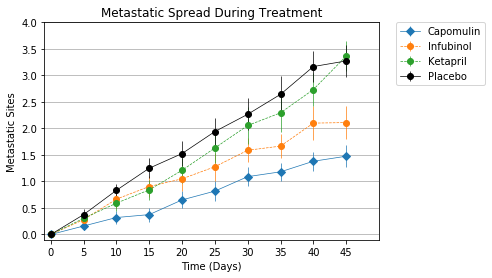

In [60]:
#For x values, Obtain Timepoint as a list

x = by_drug.index

# Generate the Plot (with Error Bars)

plt.errorbar(x, y = (met_mean_df.loc['Capomulin']["Metastatic Sites"]), 
             yerr =list(met_se['Capomulin']), fmt = 'D', label = 'Capomulin', ls = '-', lw = .7)

plt.errorbar(x, y = (met_mean_df.loc['Infubinol']["Metastatic Sites"]), 
             yerr = list(met_se['Infubinol']), fmt = 'o', label = 'Infubinol', ls = '--', lw = .7)

plt.errorbar(x, y = (met_mean_df.loc['Ketapril']["Metastatic Sites"]), 
             yerr = list(met_se['Ketapril']), fmt = 'o', label = 'Ketapril', ls = '--', lw = .7)

plt.errorbar(x, y = (met_mean_df.loc['Placebo']["Metastatic Sites"]), 
             yerr = list(met_se['Placebo']), fmt = 'o', label = 'Placebo', ls = '-', lw = .7, color = '000000')

#Format plot with labels, legend
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.grid(axis = 'y')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.ylim(-.1, 4)
plt.xlim(-1, 50)
plt.xticks(np.arange(0, 46, 5))

#Save and Show Figure
plt.savefig('F2_Metastatic_Spread.png')

## Survival Rates

In [61]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_ct = df.groupby(['Drug','Timepoint'])["Mouse ID"].count()

# # Convert to DataFrame
mice_ct_df= pd.DataFrame({"Mouse Count":mice_ct}).reset_index()

# # Preview DataFrame
mice_ct_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [62]:
# Minor Data Munging to Re-Format the Data Frames
mice_pivot = pd.pivot_table(df, values = 'Metastatic Sites', columns = ['Drug'], index = ['Timepoint'], aggfunc = 'count')

# Preview that Reformatting worked
mice_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


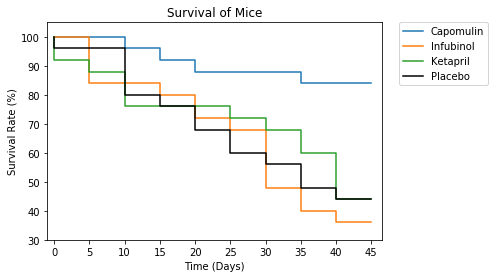

In [63]:
# Calculate Survival Rate and create new column
mice_pivot["Capomulin_perc"] = (mice_pivot["Capomulin"]/mice_pivot["Capomulin"].iloc[0]) * 100
mice_pivot["Infubinol_perc"] = mice_pivot["Infubinol"]/mice_pivot["Infubinol"].iloc[0] * 100
mice_pivot["Ketapril_perc"] = mice_pivot["Ketapril"]/mice_pivot["Ketapril"].iloc[0] * 100
mice_pivot["Placebo_perc"] = mice_pivot["Placebo"]/mice_pivot["Placebo"].iloc[0] * 100

# Survival Rate DF
surv_df = mice_pivot[['Capomulin_perc', 'Infubinol_perc', 'Ketapril_perc', 'Placebo_perc']]

# Generate the Plot
x = by_drug.index

plt.step(x, mice_pivot["Capomulin_perc"], label = "Capomulin") 
plt.step(x, mice_pivot["Infubinol_perc"], label = "Infubinol")
plt.step(x, mice_pivot["Ketapril_perc"], label = "Ketapril")
plt.step(x, mice_pivot["Placebo_perc"], label = "Placebo", color="black")

#Format the Plot
plt.title('Survival of Mice')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.xlim(-1, 46.5)
plt.ylim(30,105)
plt.xticks(np.arange(0, 50, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left', borderaxespad = 0.)

# Save the Figure & Show the Figure
plt.savefig('F3_Survival_Rates.png')

## Summary Bar Graph

In [64]:
# Calculate the percent changes for each drug
tumor_perc = 100 * (by_drug.iloc[-1] - by_drug.iloc[0])/by_drug.iloc[0]

# Display the data to confirm
tumor_perc

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

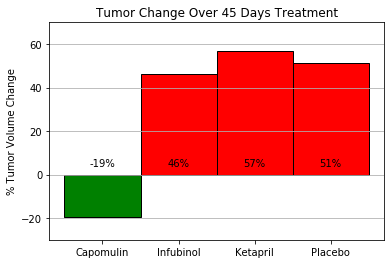

In [65]:
# Store all Relevant Percent Changes into a Tuple
perc_change = (tumor_perc["Capomulin"],
               tumor_perc["Infubinol"],
               tumor_perc["Ketapril"],
               tumor_perc["Placebo"])

# Splice the data between passing and failing drugs
fig,ax = plt.subplots()
ind = np.arange(len(perc_change))
width = 1
rectsPass = ax.bar(ind[0], perc_change[0], width, color = "green", edgecolor = 'black')
rectsFail = ax.bar(ind[1:], perc_change[1:], width, color = "red", edgecolor = 'black')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Days Treatment")
ax.set_xticks(ind)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.horizontalalignment = 'right'
ax.set_ylim([-30, 70])
ax.grid(axis = 'y')

# Use functions to label the percentages of changes
def perc_label(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 3, "%d%%" % int(height), ha = "center", va = "bottom", color = "black")

# Call functions
perc_label(rectsPass)
perc_label(rectsFail)

# Save & Show the Figure
plt.savefig('F4_Tumor_Volume_Change.png')